In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('data/train.csv')
print(np.shape(df))
df.tail()

(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [3]:
print("[Name]")
print(df['Name'].value_counts())

[Name]
Max             136
Bella           135
Charlie         107
Daisy           106
Lucy             94
Buddy            87
Princess         86
Rocky            85
Luna             68
Jack             66
Lola             61
Sadie            58
Shadow           57
Molly            57
Coco             55
Maggie           55
Chico            54
Lily             53
Oreo             53
Blue             52
Lucky            51
Toby             50
Cookie           48
Ginger           48
Lady             47
Sam              46
Duke             45
Oliver           44
Sophie           44
Milo             44
Leo              43
Rosie            43
Bear             42
Buster           42
Riley            41
Ruby             40
Sasha            40
Marley           39
Diamond          38
Peanut           38
Brownie          38
Jake             38
Rex              37
Zeus             36
Cooper           36
Chloe            36
Roxy             35
Penny            35
Minnie           35
Pepper       

In [4]:
print("[OutcomeType]")
print(df['OutcomeType'].value_counts()),
print("-"*30),
print("[OutcomeSubtype]")
print(df['OutcomeSubtype'].value_counts())
print("-"*30),
print("[AnimalType]")
print(df['AnimalType'].value_counts())
print("-"*30),
print("[SexuponOutcome]")
print(df['SexuponOutcome'].value_counts())
print("-"*30),
print("[AgeuponOutcome]")
print(df['AgeuponOutcome'].value_counts())
print("-"*30),
print("[Breed]")
print(df['Breed'].value_counts())
print("-"*30),
print("[Color]")
print(df['Color'].value_counts())

[OutcomeType]
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64
------------------------------
[OutcomeSubtype]
Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64
------------------------------
[AnimalType]
Dog    15595
Cat    11134
Name: AnimalType, dtype: int64
------------------------------
[SexuponOutcome]
Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64
----

# OutcomeType OHE 

In [5]:
print("[OutcomeType]")
print(df['OutcomeType'].value_counts())

[OutcomeType]
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64


In [6]:
df["OutcomeType"].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelBinarizer

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(df["OutcomeType"]), 
                    columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], index=df.index)
df_pre = pd.concat([df, dfX2], axis=1)
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1


In [8]:
df.groupby(['OutcomeType']).count()

,AnimalID,Name,DateTime,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
OutcomeType,,,,,,,,,
Adoption,10769,9091,10769,1966,10769,10769,10769,10769,10769
Died,197,77,197,181,197,197,197,197,197
Euthanasia,1555,740,1555,1554,1555,1555,1553,1555,1555
Return_to_owner,4786,4633,4786,0,4786,4785,4786,4786,4786
Transfer,9422,4497,9422,9416,9422,9422,9406,9422,9422


In [9]:
print(df_pre['Adoption'].value_counts())
print('\n')
print(df_pre['Transfer'].value_counts())
print('\n')
print(df_pre['Return_to_owner'].value_counts())
print('\n')
print(df_pre['Euthanasia'].value_counts())
print('\n')
print(df_pre['Died'].value_counts())
print('\n')

0    15960
1    10769
Name: Adoption, dtype: int64


0    17307
1     9422
Name: Transfer, dtype: int64


0    21943
1     4786
Name: Return_to_owner, dtype: int64


0    25174
1     1555
Name: Euthanasia, dtype: int64


0    26532
1      197
Name: Died, dtype: int64




# Name Encoding

In [9]:
def Naming(x):
    if type(x) == float:
        return 0
    else:
        return 1

In [10]:
df_pre['Name'] = df['Name'].transform(Naming)

In [11]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1


In [12]:
print(df_pre['Name'].value_counts())


1    19038
0     7691
Name: Name, dtype: int64


# Color preprocessing

In [13]:
# 'A/B' = 'A'로 표기
def color_del(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    else:
        return x

In [14]:
df_pre['Color'] = df_pre['Color'].apply(color_del)

In [15]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [16]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White,1,0,0,0,0
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1


In [17]:
df_pre["Color"].unique()

array(['Brown', 'Cream Tabby', 'Blue', 'Blue Cream', 'Tan', 'Black',
       'Blue Tabby', 'Brown Tabby', 'Red', 'White', 'Silver',
       'Orange Tabby', 'Brown Brindle', 'Chocolate', 'Calico', 'Torbie',
       'Yellow', 'Tricolor', 'Tortie', 'Gray', 'Buff', 'Seal Point',
       'Yellow Brindle', 'Fawn', 'Flame Point', 'Black Tabby', 'Red Tick',
       'Blue Merle', 'Sable', 'Brown Merle', 'Brown Tiger', 'Liver',
       'Cream', 'Blue Point', 'Apricot', 'Red Merle', 'Lynx Point',
       'Lilac Point', 'Tortie Point', 'Gray Tabby', 'Blue Tiger', 'Gold',
       'Blue Tick', 'Black Smoke', 'Calico Point', 'Black Brindle',
       'Silver Tabby', 'Orange', 'Chocolate Point', 'Agouti', 'Blue Smoke',
       'Liver Tick', 'Pink', 'Silver Lynx Point', 'Ruddy', 'Black Tiger',
       'Orange Tiger'], dtype=object)

In [18]:
# 대표 컬러로 통합
def color_union(x):
    if 'Black' in x:
        x = 'Black'
        return x
    elif 'Blue' in x:
        x = 'Blue'
        return x
    elif 'Red' in x:
        x = 'Red'
        return x
    elif 'Silver' in x:
        x = 'Silver'
        return x
    elif 'Brown' in x:
        x = 'Brown'
        return x
    elif 'Orange' in x:
        x = 'Orange'
        return x
    elif 'Cream' in x:
        x = 'Cream'
        return x
    elif 'Gray' in x:
        x = 'Gray'
        return x
    elif 'Calico' in x:
        x = 'Calico'
        return x
    elif 'Chocolate' in x:
        x = 'Chocolate'
        return x
    elif 'Tortie' in x:
        x = 'Tortie'
        return x
    elif 'Yellow' in x:
        x = 'Yellow'
        return x
    elif 'Liver' in x:
        x = 'Liver'
        return x
    else:
        return x

In [19]:
df_pre['Color'] = df_pre['Color'].apply(color_union)
df_pre['Color'].unique()

array(['Brown', 'Cream', 'Blue', 'Tan', 'Black', 'Red', 'White', 'Silver',
       'Orange', 'Chocolate', 'Calico', 'Torbie', 'Yellow', 'Tricolor',
       'Tortie', 'Gray', 'Buff', 'Seal Point', 'Fawn', 'Flame Point',
       'Sable', 'Liver', 'Apricot', 'Lynx Point', 'Lilac Point', 'Gold',
       'Agouti', 'Pink', 'Ruddy'], dtype=object)

In [20]:
# 40마리 이하인 색깔은 'etc'로 통합
df_pre['Color'] = df_pre['Color'].replace('Agouti', 'etc')
df_pre['Color'] = df_pre['Color'].replace('Apricot', 'etc')
df_pre['Color'] = df_pre['Color'].replace('Lilac Point', 'etc')
df_pre['Color'] = df_pre['Color'].replace('Pink', 'etc')
df_pre['Color'] = df_pre['Color'].replace('Ruddy', 'etc')

In [21]:
df_pre.groupby(['Color']).count()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Color,,,,,,,,,,,,,,
Black,6646,6646,6646,6646,3240,6646,6646,6641,6646,6646,6646,6646,6646,6646
Blue,2149,2149,2149,2149,1194,2149,2149,2146,2149,2149,2149,2149,2149,2149
Brown,5318,5318,5318,5318,2800,5318,5317,5313,5318,5318,5318,5318,5318,5318
Buff,267,267,267,267,93,267,267,267,267,267,267,267,267,267
Calico,579,579,579,579,381,579,579,579,579,579,579,579,579,579
Chocolate,469,469,469,469,172,469,469,469,469,469,469,469,469,469
Cream,498,498,498,498,279,498,498,497,498,498,498,498,498,498
Fawn,209,209,209,209,85,209,209,209,209,209,209,209,209,209
Flame Point,85,85,85,85,49,85,85,85,85,85,85,85,85,85


In [22]:
print(len(df['Color'].value_counts()))
print(len(df_pre['Color'].value_counts()))

366
25


# AgeuponOutcome -> DayuponOutcome Preprocessing

In [23]:
def DayuponOutcome(age_str):
    num, unit = age_str.split(' ')
    if unit == 'day' or unit == 'days':
        return( int(num) )
    elif unit == 'week' or unit == 'weeks':
        return(int(num) * 7 )
    elif unit == 'month' or unit == 'months':
        return(int(num) * 30 )
    elif unit == 'year' or unit == 'years':
        return(int(num) * 365 )

In [24]:
df_pre['AgeuponOutcome'] = df_pre['AgeuponOutcome'].fillna('0 day')
df_pre['AgeuponOutcome'] = df_pre['AgeuponOutcome'].apply(DayuponOutcome)
df_pre.rename(columns={'AgeuponOutcome':'DayuponOutcome'}, inplace = True)

In [25]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,Brown,0,0,0,0,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,Brown,0,0,0,0,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,1460,Old English Bulldog Mix,White,1,0,0,0,0
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,Brown,0,0,0,0,1


# Breed Preprocessing

In [26]:
def BreedMix(x):
    if '/' in  x:
        return 1
    elif 'Mix' in x:
        return 1
    else:
        return 0

In [27]:
df_pre['BreedMix'] = df_pre['Breed'].apply(BreedMix)

In [28]:
def Nature_Breed(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    elif ' Mix' in x:
        x = x[0:-4]
        return x
    else:
        return x

In [29]:
df_pre['Breed'] = df_pre['Breed'].apply(Nature_Breed)

In [30]:
df_pre.tail(20)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26709,A714386,0,2015-10-24 00:00:00,Adoption,NaN,Dog,Spayed Female,30,Chihuahua Shorthair,Sable,1,0,0,0,0,1
26710,A692622,1,2014-11-24 17:21:00,Transfer,Partner,Dog,Intact Female,30,Chihuahua Shorthair,Brown,0,0,0,0,1,1
26711,A666284,1,2013-10-30 18:32:00,Transfer,Partner,Dog,Intact Female,365,Cocker Spaniel,Buff,0,0,0,0,1,1
26712,A535277,1,2015-04-20 16:04:00,Return_to_owner,NaN,Dog,Neutered Male,4380,Rat Terrier,Chocolate,0,0,0,1,0,0
26713,A671169,0,2014-01-20 17:37:00,Euthanasia,Suffering,Cat,Intact Female,6570,Domestic Longhair,Tortie,0,0,1,0,0,1
26714,A679031,1,2014-05-31 16:11:00,Adoption,NaN,Cat,Spayed Female,60,Domestic Shorthair,Orange,1,0,0,0,0,1
26715,A708833,1,2015-08-05 17:03:00,Adoption,NaN,Dog,Spayed Female,60,Pointer,Black,1,0,0,0,0,1
26716,A697158,1,2015-05-02 21:04:00,Adoption,Offsite,Dog,Neutered Male,60,Newfoundland,White,1,0,0,0,0,1
26717,A519949,1,2014-06-30 17:34:00,Return_to_owner,NaN,Dog,Spayed Female,3285,Bullmastiff,Black,0,0,0,1,0,1
26718,A701044,0,2015-04-28 14:26:00,Adoption,NaN,Dog,Neutered Male,60,Siberian Husky,Black,1,0,0,0,0,1


# AnimalType OHE 

In [31]:
encoder = LabelEncoder()
df_pre['AnimalType'] = encoder.fit_transform(df['AnimalType'])

In [32]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,30,Domestic Shorthair,Brown,0,0,0,0,1,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,90,Domestic Shorthair,Brown,0,0,0,0,1,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,1460,Old English Bulldog,White,1,0,0,0,0,1
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,28,Domestic Shorthair,Black,0,0,0,0,1,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,365,Domestic Shorthair,Brown,0,0,0,0,1,1


In [33]:
df_pre['AnimalType'].value_counts()

1    15595
0    11134
Name: AnimalType, dtype: int64

# SexuponOutcome

In [34]:
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Neutered Male","Nuetered")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Spayed Female","Nuetered")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Intact Male","Male")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Intact Female","Female")

In [35]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,0,Male,30,Domestic Shorthair,Brown,0,0,0,0,1,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,0,Nuetered,90,Domestic Shorthair,Brown,0,0,0,0,1,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,1,Nuetered,1460,Old English Bulldog,White,1,0,0,0,0,1
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,0,Male,28,Domestic Shorthair,Black,0,0,0,0,1,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,0,Male,365,Domestic Shorthair,Brown,0,0,0,0,1,1


In [36]:
df_pre['SexuponOutcome'].value_counts()

Nuetered    18599
Male         3525
Female       3511
Unknown      1093
Name: SexuponOutcome, dtype: int64

In [37]:
df_pre['SexuponOutcome'].fillna("Unknown", inplace=True)

In [38]:
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Neutered Male","Nuetered")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Spayed Female","Nuetered")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Intact Male","Male")
df_pre['SexuponOutcome'] = df_pre['SexuponOutcome'].replace("Intact Female","Female")

In [39]:
df_pre['SexuponOutcome'].value_counts()

Nuetered    18599
Male         3525
Female       3511
Unknown      1094
Name: SexuponOutcome, dtype: int64

# Laber Encoding

In [40]:
del df_pre['OutcomeSubtype']

df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26724,A702446,0,2015-05-14 11:56:00,Transfer,0,Male,30,Domestic Shorthair,Brown,0,0,0,0,1,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,0,Nuetered,90,Domestic Shorthair,Brown,0,0,0,0,1,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,1,Nuetered,1460,Old English Bulldog,White,1,0,0,0,0,1
26727,A677478,0,2014-04-27 12:22:00,Transfer,0,Male,28,Domestic Shorthair,Black,0,0,0,0,1,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,0,Male,365,Domestic Shorthair,Brown,0,0,0,0,1,1


In [41]:
encoder = LabelEncoder()

df_pre['SexuponOutcome'] = encoder.fit_transform(df_pre['SexuponOutcome'])
df_pre['Breed'] = encoder.fit_transform(df_pre['Breed'])
df_pre['Color'] = encoder.fit_transform(df_pre['Color'])

In [42]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26724,A702446,0,2015-05-14 11:56:00,Transfer,0,1,30,80,2,0,0,0,0,1,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,0,2,90,80,2,0,0,0,0,1,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,1,2,1460,147,22,1,0,0,0,0,1
26727,A677478,0,2014-04-27 12:22:00,Transfer,0,1,28,80,0,0,0,0,0,1,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,0,1,365,80,2,0,0,0,0,1,1


# AnimalID

In [43]:
df_pre['AnimalID'] = encoder.fit_transform(df['AnimalID'])

In [44]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix
26724,18631,0,2015-05-14 11:56:00,Transfer,0,1,30,80,2,0,0,0,0,1,1
26725,26055,0,2016-01-20 18:59:00,Transfer,0,2,90,80,2,0,0,0,0,1,1
26726,16731,1,2015-03-09 13:33:00,Adoption,1,2,1460,147,22,1,0,0,0,0,1
26727,7450,0,2014-04-27 12:22:00,Transfer,0,1,28,80,0,0,0,0,0,1,1
26728,20751,0,2015-07-02 09:00:00,Transfer,0,1,365,80,2,0,0,0,0,1,1


# DateTime 분석

In [97]:
import re

In [98]:
def MakeYear(x):
    A = re.search(r'\d\d\d\d', str(x))
    return A.group()

In [99]:
df_pre['Year'] = df_pre['DateTime'].apply(MakeYear)

In [100]:
def MakeMonth(x):
    A = re.search(r'-\d\d-', str(x))
    B = re.search(r'\d\d', str(A))
    return B.group()

In [101]:
df_pre['Month'] = df_pre['DateTime'].apply(MakeMonth)

In [107]:
df_pre['YearMonth'] = df_pre['Year'] + df_pre['Month']

In [108]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,DayuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,BreedMix,Year,Month,YearMonth
26724,18631,0,2015-05-14 11:56:00,Transfer,0,1,30,80,2,0,0,0,0,1,1,2015,05,201505
26725,26055,0,2016-01-20 18:59:00,Transfer,0,2,90,80,2,0,0,0,0,1,1,2016,01,201601
26726,16731,1,2015-03-09 13:33:00,Adoption,1,2,1460,147,22,1,0,0,0,0,1,2015,03,201503
26727,7450,0,2014-04-27 12:22:00,Transfer,0,1,28,80,0,0,0,0,0,1,1,2014,04,201404
26728,20751,0,2015-07-02 09:00:00,Transfer,0,1,365,80,2,0,0,0,0,1,1,2015,07,201507


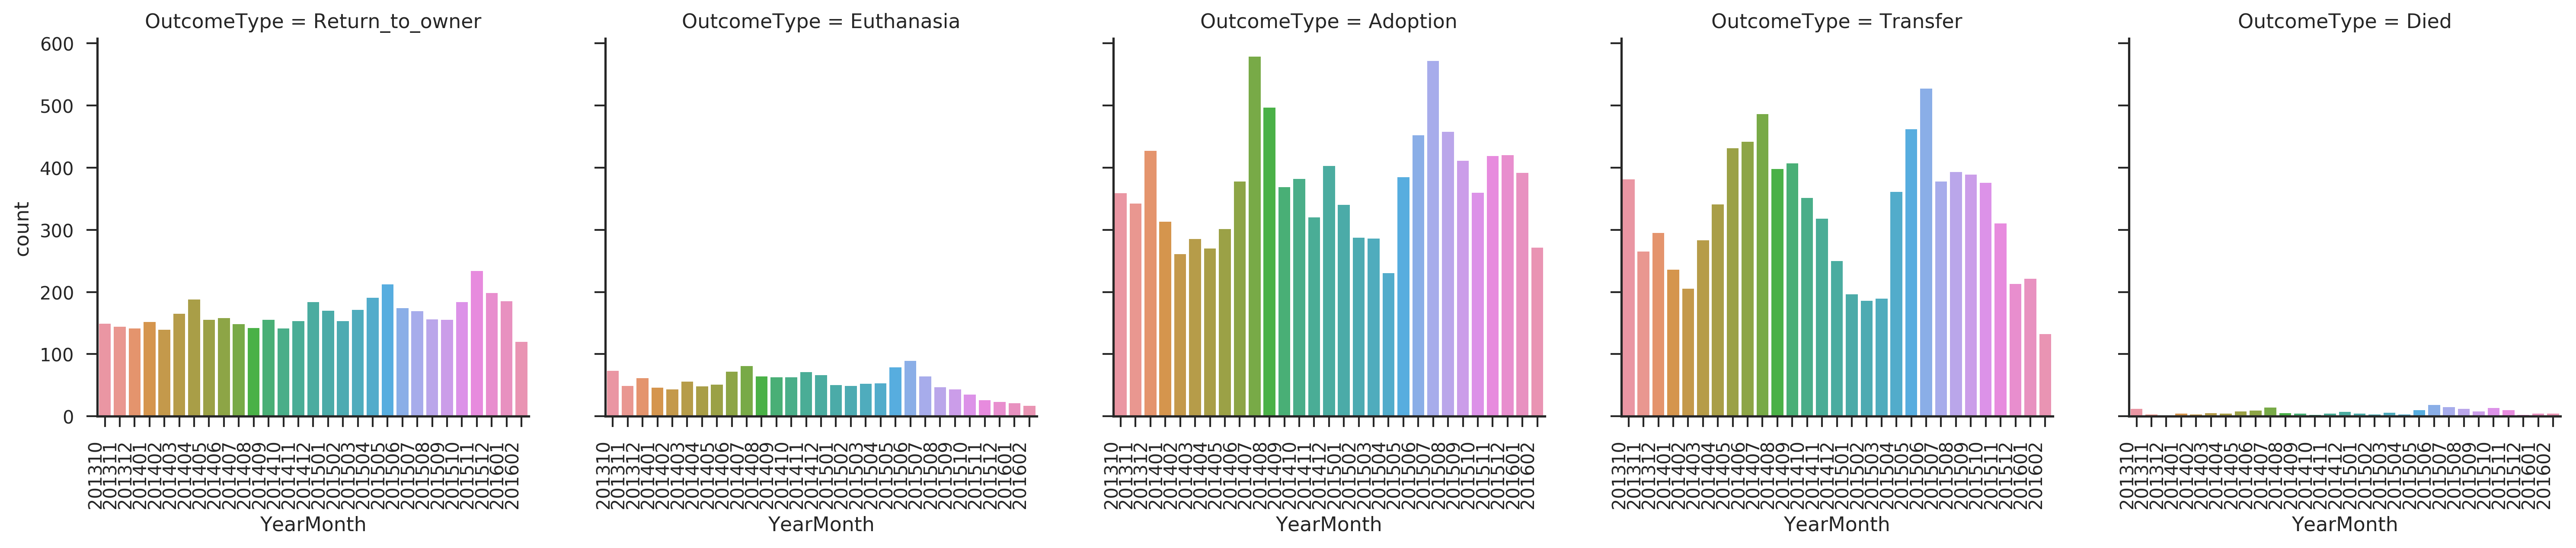

In [112]:
import seaborn as sns
sns.set(style="ticks")
ymd_outcome = sns.factorplot(x="YearMonth", col="OutcomeType", data=df_pre, kind='count' )
ymd_outcome.set_xticklabels(rotation=90, ha="right")

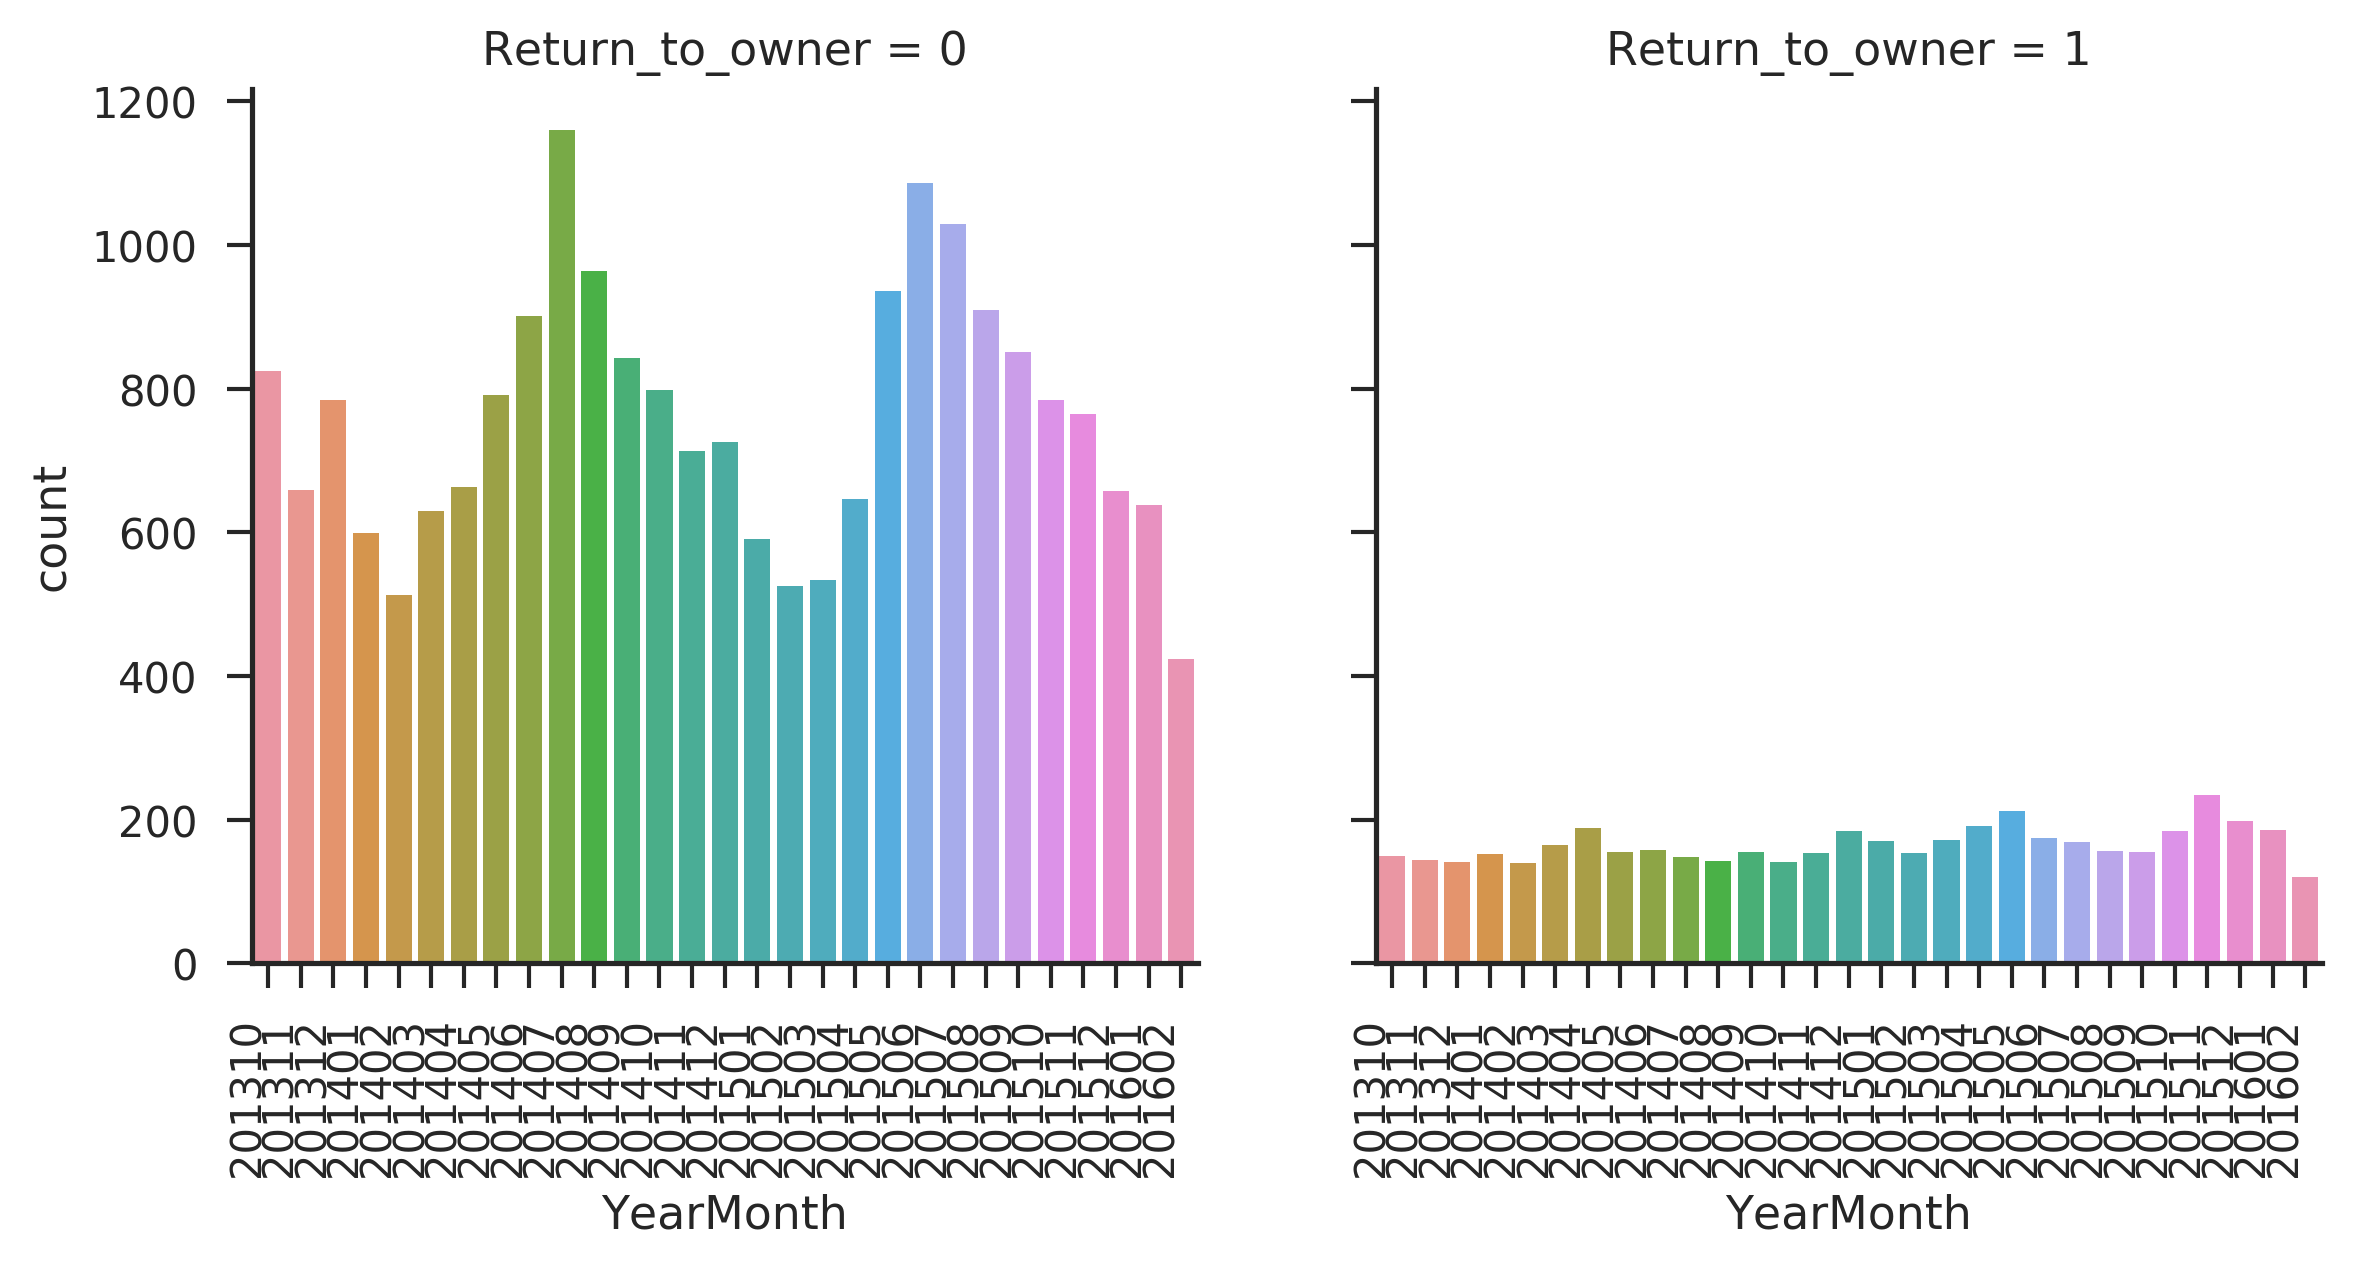

In [120]:
sns.set(style="ticks")
ymd_outcome1 = sns.factorplot(x="YearMonth", col="Return_to_owner", data=df_pre, kind='count' )
ymd_outcome1.set_xticklabels(rotation=90, ha="right")

# Decision Tree 

In [ ]:
df_x = df_pre.iloc[:, [1,2,3,4,5,6,12]]
df_y = df_pre.iloc[:, [7,8,9,10,11]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=0)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=7, min_samples_leaf=4).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import *
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_features=7)
forest.fit(X_train, y_train)

In [ ]:
print(classification_report(y_train, forest.predict(X_train)))
print(classification_report(y_test, forest.predict(X_test)))